In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../out/result_tables/cifar10_record_stats.csv')

In [3]:
# compute the mean of df

def compute_mean(df):
    """
    Computes the mean of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to compute the mean of.

    Returns:
    pd.DataFrame: A DataFrame with the mean of the input DataFrame.
    """
    return df.mean()

df.iloc[0, :]

Unnamed: 0                                                                                      0
test_loss                                                                                1.566207
test_acc                                                                                   0.6075
&bs=512&scheme=forward4&rounds=25&metric=cos                                             0.974532
&bs=512&scheme=forward4&rounds=25&metric=var                                             0.159944
                                                                      ...                        
&bs=512&scheme=leaf8d&rounds=400&metric=var     {'module.seq.0.weight': 0.01855282299220562, '...
&bs=512&scheme=leaf8d&rounds=400&metric=bias    {'module.seq.0.weight': 0.01855282299220562, '...
&bs=512&scheme=leaf4d&rounds=400&metric=cos     {'module.seq.0.weight': tensor(0.7593, device=...
&bs=512&scheme=leaf4d&rounds=400&metric=var     {'module.seq.0.weight': 0.08407353609800339, '...
&bs=512&scheme=leaf4

In [4]:
bs_means = {}

time_frame = 0

time_df = df.iloc[time_frame, :]
# Define batch sizes to consider
batch_sizes = [4, 32, 64, 128, 256, 512, 2048]

# Iterate over each column in the DataFrame
for col in time_df.keys():
    # Check if the column name contains 'bs'
    if 'bs' in col:
        # Extract the batch size and tail
        bs_part = col.split('_')[0]  # e.g., 'bs512'
        tail = '_'.join(col.split('_')[1:])  # e.g., 'f2_b2_rnearest_False_bias'
        
        # Ensure the batch size is one of the considered sizes
        for bs in batch_sizes:
            if f'bs{bs}' in bs_part:
                # Initialize list for this batch size if not already done
                if bs not in bs_means:
                    bs_means[bs] = {}
                
                # Append the value to the list for this batch size
                bs_means[bs][tail] = time_df[col]

In [5]:
def to_2d(df, y_axis_name):
    for key in df.keys():
        if y_axis_name in key:
            return df[key]

In [6]:
bs_means

{}

In [8]:
bs_means
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    # data = data.drop(columns=['Unnamed: 0',]) #'test_loss', 'test_acc', 'bs512_grad_norm_entire'])
    df = pd.DataFrame(data)

    # Create the heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".10f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

# plot_heatmap(pivot_df)
plot_heatmap(df)


ValueError: could not convert string to float: "{'module.seq.0.weight': tensor(0.9779, device='cuda:0'), 'module.seq.3.weight': tensor(0.9569, device='cuda:0'), 'module.seq.7.weight': tensor(0.9659, device='cuda:0'), 'module.seq.10.weight': tensor(0.9605, device='cuda:0'), 'module.seq.13.weight': tensor(0.9469, device='cuda:0'), 'module.seq.17.weight': tensor(0.9377, device='cuda:0'), 'module.seq.21.weight': tensor(0.9487, device='cuda:0'), 'module.seq.24.weight': tensor(0.9147, device='cuda:0'), 'module.seq.29.weight': tensor(0.9858, device='cuda:0')}"

<Figure size 2000x1500 with 0 Axes>

In [19]:
df_long

NameError: name 'df_long' is not defined

In [55]:
# 2d plot

# heatmap plot

def plot_2d(df, x, y):
    for x in bss:
        for y in 



x = ["bs4", "bs32", "bs64", "bs128", "bs256", "bs512", "bs2048"]
y = ["f0", "f1", "f2", "f3"] 

SyntaxError: invalid syntax (3641994309.py, line 7)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.backends
%matplotlib inline 
import matplotlib.pyplot as plt


def make_plot(df, dir, levels=10):
    # df = df.drop(columns=["method"])
    grouped_df = df.groupby(['act_man_width', 'batch_size']).mean().reset_index()
    df_avg = grouped_df
    # Pivot the data to create a grid for the contour plot
    pivot_table = df_avg.pivot_table(index='batch_size', columns='act_man_width', values='grad_norm_entire_ema')

    # Create a meshgrid for the contour plot
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values

    print(pivot_table.shape)
    print(pivot_table)

    # Pad the surrounding of Z with the same value as the edge (pad on the beginning side)
    Z = np.pad(Z, ((1, 0), (1, 0)), mode='edge')
    print(X.shape, Y.shape, Z.shape)

    # Update meshgrid to match the padded Z
    X, Y = np.meshgrid(
        np.insert(pivot_table.columns, 0, pivot_table.columns[0] - 1), 
        np.insert(pivot_table.index, 0, pivot_table.index[0] - 1)
    )

    # Create a 2D contour plot
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(X, Y, Z, levels=levels)
    plt.colorbar(cp, label='Norm')

    # Set the y-axis to log scale if needed
    # plt.yscale('log')  # Uncomment this line if the y-axis should be in log scale

    # Labeling the axes
    plt.xlabel('Mantissa Width')
    plt.ylabel('Batch Size')
    lr = df['lr'].iloc[0]
    plt.savefig(f"{dir}/{lr}.png")


In [121]:
ma_df = df.rolling(window=10).mean()

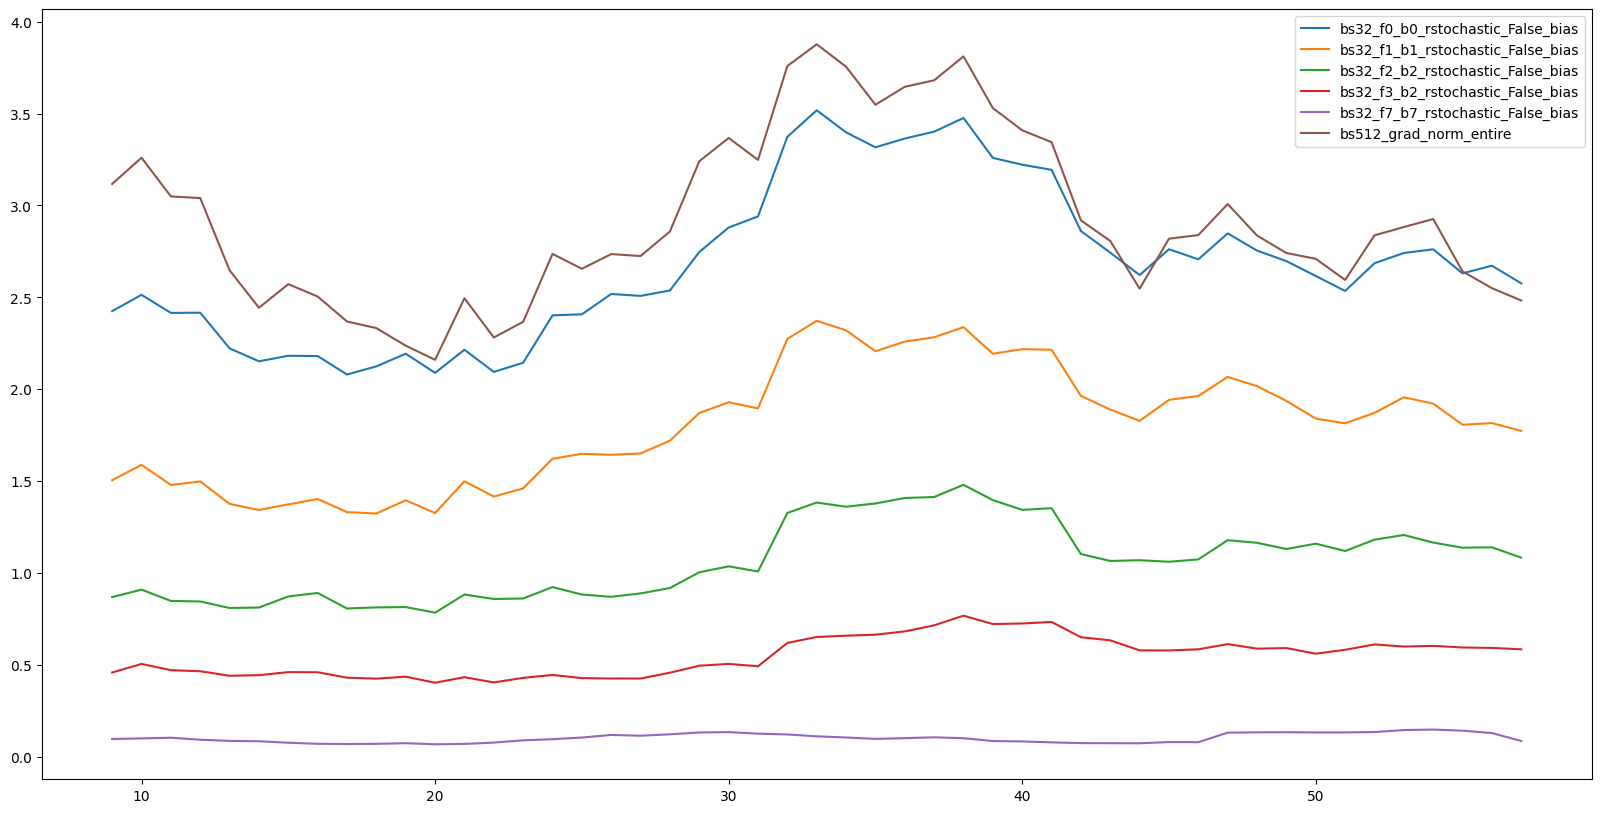

In [39]:
plt.figure(figsize=(20, 10))
for i in df.columns:
    if "bias" in i and "bs32" in i and "nearest" not in i:
        plt.plot(ma_df[i], label=i)
plt.plot(ma_df["bs32_grad_norm_entire"], label="bs512_grad_norm_entire")
plt.legend()

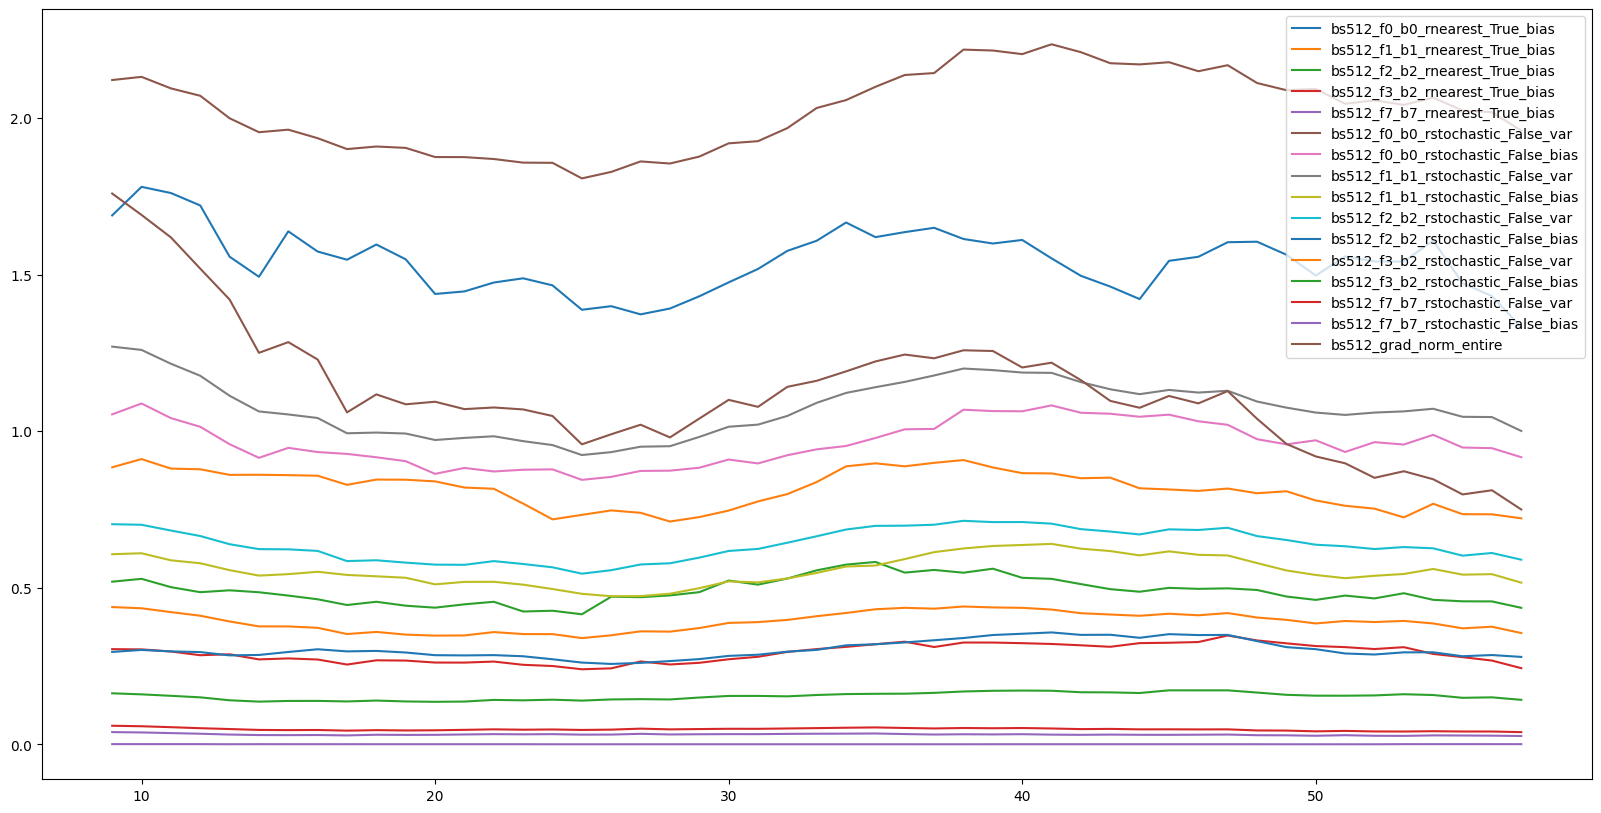

In [48]:
bs = "bs512"
f = "f2"
plt.figure(figsize=(20, 10))
for i in df.columns:
    if "var" in i and bs in i :
        plt.plot(ma_df[i], label=i)
    if "bias" in i and bs in i:
        plt.plot(ma_df[i], label=i)
plt.plot(ma_df[f"{bs}_grad_norm_entire"], label=f"{bs}_grad_norm_entire")
# plt.plot(ma_df["bs32_grad_norm_entire"], label="bs128_grad_norm_entire")
plt.legend()

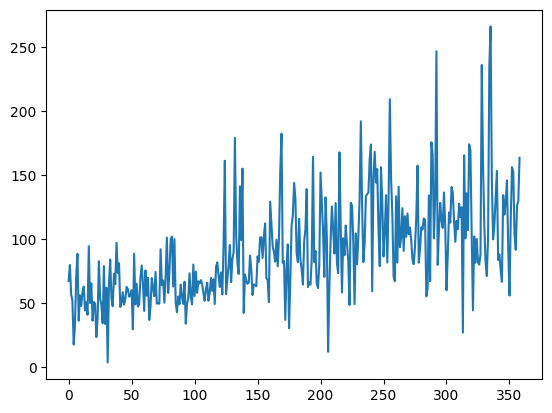

In [18]:
plt.plot(df["bs2048_abs_hessian"])

In [58]:
df

,Unnamed: 0,test_loss,test_acc,&bs=512&metrics=grad_norm_entire,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.0.weight,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.3.weight,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.5.weight,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.5.bias,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.7.weight,&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.8.weight,...,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.17.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.19.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.19.bias,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.21.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.22.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.22.bias,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.24.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.25.weight,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.25.bias,&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.29.weight
0,0,1.640865,0.5578,0.402046,0.003388,0.004636,0.000147,0.000147,0.003758,0.000105,...,0.999774,1.0,1.0,0.99975,1.0,1.0,0.999784,1.0,1.0,0.999969


In [70]:
df.iloc[0, :].keys()

Index(['Unnamed: 0', 'test_loss', 'test_acc',
       '&bs=512&metrics=grad_norm_entire',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.0.weight',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.3.weight',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.5.weight',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.5.bias',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.7.weight',
       '&bs=512&scheme=back8&rounds=25&metric=error_norm&layer=module.seq.8.weight',
       ...
       '&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.17.weight',
       '&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.19.weight',
       '&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.19.bias',
       '&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.21.weight',
       '&bs=512&scheme=leaf4&rounds=400&metric=sim&layer=module.seq.22.wei

In [139]:
def pivot_and_pad_dataframe(df,  value_column, fill_value=None):
    import pandas as pd
    import re

    # Extract parameters from the parameter column
    def extract_parameters(param):
        return dict(re.findall(r'&([^=]+)=([^&]*)', param))

    # Apply the extraction function
    for k, v in df.items():
        new_col = k
        if '&' in k:
            new_col = extract_parameters(k)
        print(new_col, v)

    # params_df = df.keys().apply(extract_parameters).apply(pd.Series)

    # Create a pivot table
    # pivot_df = df.pivot_table(values=value_column, index=params_df.columns.tolist(), columns='layer', fill_value=fill_value).reset_index()

    # Fill missing layers with the specified fill value
    # for layer in layers:
    #     if layer not in pivot_df.columns:
    #         pivot_df[layer] = fill_value if fill_value is not None else df[value_column].iloc[0]

    return pivot_df


def pivot_and_pad_dataframe(df, col,index, fill_value=None):
    # Extract parameters from the parameter column
    def extract_parameters(param):
        return dict(re.findall(r'&([^=]+)=([^&]*)', param))

    # Create a list to hold the new column data
    new_data = []

    # Iterate over the columns in the DataFrame
    for k, v in df.items():
        if '&' in k:
            params = extract_parameters(k)
            params['value'] = v
            new_data.append(params)
        else:
            new_data.append({k: v})

    # Convert the list of dictionaries to a DataFrame
    expanded_df = pd.DataFrame(new_data)

    # Pivot the DataFrame
    pivot_df = expanded_df.pivot_table(columns=col, values='value', index=index,fill_value=fill_value)
    pivot_df = pivot_df.rename(columns=lambda x: int(re.sub(r'[a-z.]', '', x)))
    pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

    return pivot_df


new_df = df.filter(regex='error_norm')

pivot_df = pivot_and_pad_dataframe(new_df.iloc[0, :], 'layer', index=["scheme", "metric", "rounds"], fill_value=0)

pivot_df

layer                              0         3         7         10        13  \
scheme    metric     rounds                                                     
all4      error_norm 100     0.111080  0.110642  0.095084  0.081212  0.095116   
                     25      0.104794  0.107145  0.093439  0.079957  0.095247   
                     400     0.108780  0.110742  0.095057  0.080777  0.095617   
all4d     error_norm 400     0.155030  0.161848  0.141505  0.134575  0.129942   
all8      error_norm 100     0.008603  0.009630  0.007260  0.007258  0.011154   
                     25      0.008769  0.009784  0.007393  0.007303  0.011153   
                     400     0.008459  0.009663  0.007298  0.007270  0.011148   
all8d     error_norm 400     0.039611  0.033804  0.033277  0.031281  0.029962   
back4     error_norm 100     0.065280  0.078752  0.067380  0.059163  0.073199   
                     25      0.064281  0.078702  0.066663  0.058695  0.073432   
                     400     0.064850  0.078555  0.067442  0.059125  0.073137   
back4d    error_norm 400     0.097838  0.113814  0.099870  0.100475  0.105614   
back8     error_norm 100     0.005286  0.005776  0.004868  0.004139  0.005367   
                     25      0.005194  0.005810  0.004890  0.004138  0.005363   
                     400     0.005214  0.005800  0.004869  0.004144  0.005367   
back8d    error_norm 400     0.032408  0.030448  0.031614  0.030035  0.027856   
forward4  error_norm 100     0.086266  0.080237  0.066968  0.053540  0.061391   
                     25      0.087089  0.079541  0.065568  0.052624  0.061285   
                     400     0.087885  0.079566  0.066327  0.053116  0.061210   
forward4d error_norm 400     0.111158  0.096752  0.079180  0.068262  0.071300   
forward8  error_norm 100     0.006891  0.007809  0.005477  0.005987  0.009768   
                     25      0.006745  0.007772  0.005431  0.005965  0.009737   
                     400     0.006497  0.007728  0.005413  0.005966  0.009756   
forward8d error_norm 400     0.016513  0.015585  0.012124  0.009739  0.011263   
leaf4     error_norm 100     0.046083  0.068549  0.056616  0.047913  0.068826   
                     25      0.046312  0.068421  0.056659  0.047874  0.068850   
                     400     0.046639  0.068396  0.056611  0.047910  0.068805   
leaf4d    error_norm 400     0.100793  0.126809  0.105805  0.103298  0.110110   
leaf8     error_norm 100     0.004475  0.005349  0.004330  0.003549  0.005082   
                     25      0.004603  0.005404  0.004315  0.003561  0.005064   
                     400     0.004486  0.005358  0.004328  0.003554  0.005078   
leaf8d    error_norm 400     0.029054  0.029055  0.030340  0.028317  0.026397   

layer                              17        21        24        29  
scheme    metric     rounds                                          
all4      error_norm 100     0.107742  0.083687  0.085001  0.030782  
                     25      0.108554  0.083836  0.085430  0.032753  
                     400     0.107803  0.083767  0.084965  0.030718  
all4d     error_norm 400     0.126216  0.103105  0.109872  0.027567  
all8      error_norm 100     0.014798  0.009927  0.015826  0.001900  
                     25      0.014795  0.009961  0.015844  0.001950  
                     400     0.014786  0.009934  0.015860  0.001845  
all8d     error_norm 400     0.028240  0.027024  0.049109  0.003897  
back4     error_norm 100     0.069518  0.061127  0.057789  0.019002  
                     25      0.069481  0.060930  0.057645  0.019012  
                     400     0.069642  0.061117  0.057840  0.019007  
back4d    error_norm 400     0.089462  0.074018  0.089408  0.017035  
back8     error_norm 100     0.005118  0.004953  0.006344  0.001223  
                     25      0.005137  0.004959  0.006360  0.001201  
                     400     0.005114  0.004952  0.006350  0.001228  
back8d    error_norm 400     0.023867  0.024284  0.0458